# Práctica 3

Integrantes:
- Angel Martinez
- Alejandra Sarria
- Juan Segura

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Diseño de los gráficos
sns.set()
sns.set_context("paper")
sns.set_palette("colorblind")

### Experimento 1

El objeto se encuentra en la posicion del riel 143cm.

Se va a medir si+ distancia a la imagen desde la lente positiva, y se mide la distancia al objeto desde la lente negativa.

In [11]:
# Distancia entre las lentes negativa y positiva
d1 = 26 # 26 cm

# Incertidumbre nominal de las medidas de distancia
ds = 0.1 # 0.1 cm

# Distancia entre la lente negativa y el objeto
So_me1 = np.array([8.0, 13.0, 18.0, 23.0, 28.0, 33.0, 38.0, 43.0, 48.0, 53.0])

# Distancia a la imagen desde la lente positiva
si_ma1 = np.array([[101.1, 105.3, 100.9, 101.2, 102.8],
                   [78.4, 82.5, 81.7, 79.2, 80.9],
                   [73.5, 72.5, 73.3, 73.8, 71.4],
                   [69.5, 68.4, 68.6, 67.0, 64.7],
                   [64.5, 64.4, 64.6, 62.7, 62.4],
                   [61.6, 61.7, 61.8, 59.8, 61.7],
                   [59.4, 58.4, 59.6, 58.5, 58.8],
                   [55.9, 56.9, 57.5, 57.3, 57.7],
                   [56.1, 57.8, 56.6, 56.7, 56.8],
                   [54.9, 56.2, 55.8, 53.9, 56.4]])

# Distancia imagen desde la lente positiva promedio y su error
Si_ma1 = np.array([np.mean(i) for i in si_ma1])
si_ma_desv1 = np.array([np.std(i) for i in si_ma1])
dSi_ma1 = np.sqrt(si_ma_desv1**2 + ds**2)

# Distancia entre la lente positiva y la imagen en funcion de la distancia lente negativa-objeto
def Si_pos(So_menos, f_menos):
    f_mas = 24.7
    numerador = f_menos * (f_mas * So_menos + d1 * f_mas) + f_mas * So_menos
    denominador = f_menos * (So_menos + d1) - d1 * So_menos - f_mas
    Si_positiva = numerador / denominador
    return Si_positiva

# Calculo del R2
def R2(funcion, so_datos, si_datos, par):
    si_ajuste = funcion(so_datos, *par)
    RSS = np.sum((si_datos - si_ajuste)**2)
    TSS = np.sum((si_datos - np.mean(si_datos))**2)
    return 1 - RSS / TSS

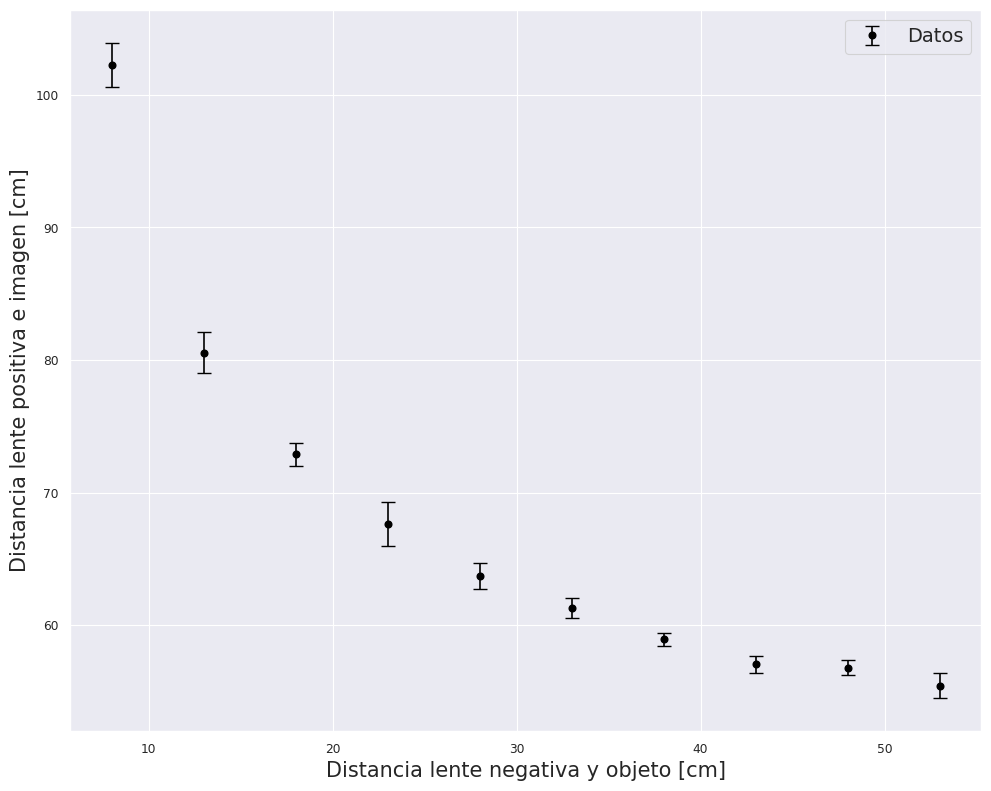

In [15]:
# Realizar el ajuste de datos para el primer experimento (Ecuacion de Gauss)
f_neg, df_neg = curve_fit(Si_pos, So_me1, Si_ma1, sigma= dSi_ma1)
f_neg = f_neg[0]; df_neg = np.sqrt(df_neg[0][0])

# Calculo del R2
r2 = R2(Si_pos, So_me1, Si_ma1, (f_neg,))

# Graficación de la curva
fig, ax = plt.subplots(figsize = (10, 8))

so_lins = np.linspace(So_me1[0], So_me1[-1], 100)
#ax.plot(so_lins, Si_pos(so_lins, f_neg), label=rf"Ajuste $f_- = {f_neg:.1f} \pm {df_neg:.1f}$, $R^2 = {r2:.2f}$")

ax.errorbar(So_me1, Si_ma1, yerr = dSi_ma1, fmt='o', color='black', ecolor='black', capsize=5, label='Datos')
ax.set_xlabel(r"Distancia lente negativa y objeto [cm]", fontsize= 15)
ax.set_ylabel(r"Distancia lente positiva e imagen [cm]", fontsize= 15)
ax.grid(True)
ax.legend(fontsize= 14)
plt.tight_layout()
plt.savefig("Prac3_exp1.pdf")
plt.show()

### Experimento 2

In [8]:
# Distancia entre las dos lentes
d2 = 26.5 # 26.5 cm 

# Distancia de la positiva no auxiliar al objeto (cm)
So_pos2 = np.array([5.5, 7.0, 8.5, 10, 11.5, 13.0, 14.5, 16.0, 17.5, 19.0])

# Distancia de la lente auxiliar a la imagen
si_aux2 = np.array([[104.9, 99.1, 100.6, 102.8, 98.1], # 5.5
                    [76.4, 76.7, 74.4, 77.0, 74.1],    # 7.0
                    [69.8, 71.9, 70.5, 70.6, 69.8],    # 8.5
                    [59.1, 57.2, 57.8, 58.0, 56.7],    # 10.0
                    [52.7, 54.0, 55.2, 52.9, 54.2],    # 11.5
                    [47.7, 47.2, 46.4, 47.7, 48.3],    # 13.0
                    [42.7, 42.3, 43.2, 43.6, 41.9],    # 14.5
                    [39.3, 40.0, 39.7, 39.9, 40.0],    # 16.0
                    [35.0, 37.4, 35.8, 36.7, 35.6],    # 17.5
                    [34.2, 35.6, 35.6, 35.2, 34.5]])   # 19.0

# Distancia imagen desde la lente auxiliar promedio y su error
Si_aux2 = np.array([np.mean(i) for i in si_aux2])
si_aux_desv2 = np.array([np.std(i) for i in si_aux2])
dSi_aux2 = np.sqrt(si_aux_desv2**2 + ds**2)

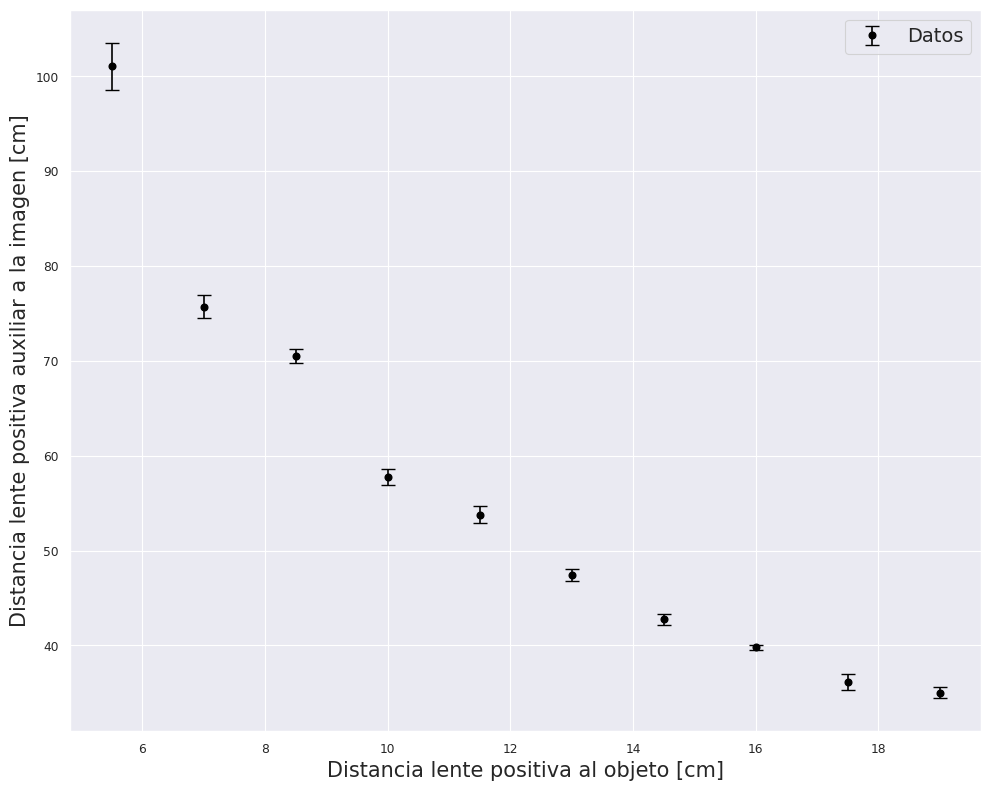

In [16]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.errorbar(So_pos2, Si_aux2, yerr = dSi_aux2, fmt='o', color='black', ecolor='black', capsize=5, label='Datos')
ax.set_xlabel(r"Distancia lente positiva al objeto [cm]", fontsize= 15)
ax.set_ylabel(r"Distancia lente positiva auxiliar a la imagen [cm]", fontsize= 15)
ax.grid(True)
ax.legend(fontsize= 14)
plt.tight_layout()
plt.savefig("Prac_exp2.pdf")
plt.show()